# Week 1 handin

## 01 Assignment
1. load 'data/iris_data.csv' into a dataframe (use decimal=',') and remove the 2 Petal columns. Now we are left with a D feature space
2. get unique labels (Species column)
3. plot with a scatter plot each iris flower sample colored by label (3 different colors)image.png
4. use: MeanShift and estimate_bandwidth from sklearn.cluster to first estimate bandwidth and then get the clusters (HINT: estimate_bandwidth() takes an argument: quantile set it to 0.2 for best result)
5. print out labels, cluster centers and number of clusters (as returned from the MeanShift function)
6. create a new scatter plot where each flower is colored according to cluster label
7. add a dot for the cluster centers
8. Compare the 2 plots (colored by actual labels vs. colored by cluster label)
9. Try changing the 'quantile' argument to 0.15 and see what happens to your cluster plot.


## 02 Status
Did it...


## 03 Solution part 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

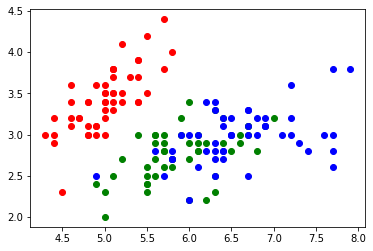

In [2]:
# 1. load 'data/iris_data.csv' into a dataframe (use decimal=',') and remove the 2 Petal columns. Now we are left with a D feature space
#2. get unique labels (Species column)
#3. plot with a scatter plot each iris flower sample colored by label (3 different colors)image.png

df = pd.read_csv('data/iris_data.csv', decimal=",")
del df['Petal length']
del df['Petal width']

unique = df.Species.unique()

fig = plt.figure()
ax = fig.add_subplot(111)

for i, col in zip(unique, 'rgb'):
    d = df[df.Species == i]
    x, y = d["Sepal length"], d["Sepal width"]
    ax.scatter(x, y, c=col)


In [3]:




# 4. use: MeanShift and estimate_bandwidth from sklearn.cluster to first estimate bandwidth and then get the clusters (HINT: estimate_bandwidth() takes an argument: quantile set it to 0.2 for best result)
# 5. print out labels, cluster centers and number of clusters (as returned from the MeanShift function)
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn import preprocessing
import numpy as np


label_enc = preprocessing.LabelEncoder()
df["Species"] = label_enc.fit_transform(df["Species"].astype(str))

def mean_shift(d, q=0.2):
    bandwith = estimate_bandwidth(d, quantile=q)
    ms = MeanShift(bandwidth=bandwith)
    ms.fit(d)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    labels_unique = np.unique(labels)
    n_clusters = len(labels_unique)
    
    return labels, cluster_centers, n_clusters

labels, cluster_centers, n_clusters = mean_shift(df)

print(f'Labels: {labels}.')
print(f'Cluster centers: {cluster_centers}.')
print(f'Numbers of clusters: {n_clusters}.')

Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 1 1 3 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 3 2 2 2 2
 2 2 3 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2].
Cluster centers: [[4.95227273 3.37727273 0.        ]
 [5.9        2.775      1.        ]
 [6.49714286 3.         2.        ]
 [4.9        2.5        2.        ]].
Numbers of clusters: 4.


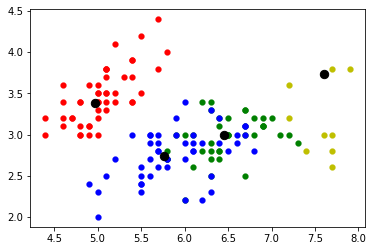

In [7]:
#6. create a new scatter plot where each flower is colored according to cluster label
#7. add a dot for the cluster centers
fig = plt.figure()
ax = fig.add_subplot(111)

for idx, col in zip(range(n_clusters), "rgby"):
    data = df[labels == idx]
    x, y = data["Sepal length"], data["Sepal width"]
    ax.scatter(x, y, c=col, linewidth=0.2)
    cluster_center = cluster_centers[idx]
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=70)


In [5]:
#8. Compare the 2 plots (colored by actual labels vs. colored by cluster label)
#i have compared the two plots and they are almost identical if you combine the yellow and green clusters

In [6]:
labels, cluster_centers, n_clusters = mean_shift(df, 0.15)

print(f'Labels: {labels}.')
print(f'Cluster centers: {cluster_centers}.')
print(f'Numbers of clusters: {n_clusters}.')

Labels: [0 0 0 0 0 0 0 0 5 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 5 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 3 4 1 1 3 1
 1 1 4 1 1 1 3 3 1 1 4 3 1 1 3 1 1 1 1 3 3 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1
 1 1].
Cluster centers: [[4.97435897 3.38205128 0.        ]
 [6.45483871 3.         2.        ]
 [5.76451613 2.74193548 1.        ]
 [7.6        3.73333333 2.        ]
 [4.9        2.5        2.        ]
 [4.5        2.3        0.        ]].
Numbers of clusters: 6.


In [ ]:
#Now it found 6 clusters, and before it only found 4...